<a href="https://colab.research.google.com/github/tasyasvdh09/PCVK_Genap_2023/blob/main/Progress%201_Final%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DETEKSI WAJAH BERBASIS SEGMENTASI WARNA KULIT MENGGUNAKAN RUANG WARNA YCbCr &TEMPLATE MATCHING**

Anggota Kelompok:
1. Tasya Sevia Adha
2. Annisa Mutiara

Penelitian ini dibatasi pada penentuan wilayah wajah dari tampak depan (frontal) wajah manusia. 
Untuk penelitian lanjutan, kami menggunakan posisi lain, yaitu tampak samping. 
Setelah wilayah wajah dapat terdeteksi dalam penelitian ini, untuk penelitian lanjutan kami menambahkan pengenalan ciri wajah ataupun pengenalan ekspresi wajah.

In [34]:
# import folder yang ada di drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# import library
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

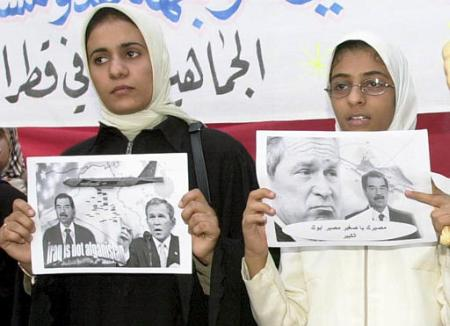

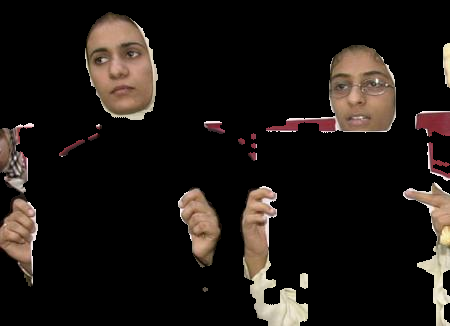

In [ ]:
# input gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/images/Sample Citra FDDB/2002/07/29/big/img_624.jpg')

# convert gambar ke YCbCr color space
image_ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

# menentukan batas bawah dan atas untuk warna kulit dalam ruang warna YCbCr
lower_skin = np.array([0, 133, 77], dtype=np.uint8)
upper_skin = np.array([255, 173, 127], dtype=np.uint8)

# membuat binary mask untuk warna kulit
skin_mask = cv2.inRange(image_ycrcb, lower_skin, upper_skin)

# menggunakan morphological operations untuk menghilangkan noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_OPEN, kernel)
skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_CLOSE, kernel)

# menemukan kontur daerah kulit
contours, _ = cv2.findContours(skin_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# membuat blank mask untuk final result
result_mask = np.zeros_like(image)

# menggambar kontur pada mask
cv2.drawContours(result_mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# mask pada gambar original
result = cv2.bitwise_and(image, result_mask)

# tampilan gambar original
cv2_imshow(image)

# tampilan hasil segmentasi
cv2_imshow(result)

cv2.waitKey(0)
cv2.destroyAllWindows()

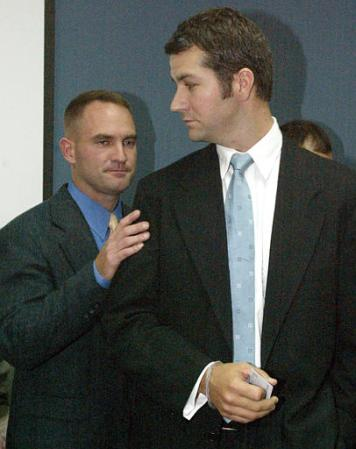

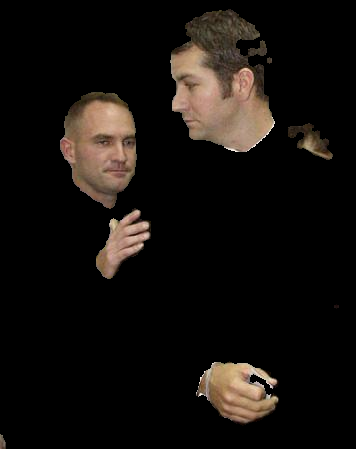

In [ ]:
# input gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/images/Sample Citra FDDB/2002/07/29/big/img_889.jpg')

# convert gambar ke YCbCr color space
image_ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

# menentukan batas bawah dan atas untuk warna kulit dalam ruang warna YCbCr
lower_skin = np.array([0, 133, 77], dtype=np.uint8)
upper_skin = np.array([255, 173, 127], dtype=np.uint8)

# membuat binary mask untuk warna kulit
skin_mask = cv2.inRange(image_ycrcb, lower_skin, upper_skin)

# menggunakan morphological operations untuk menghilangkan noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_OPEN, kernel)
skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_CLOSE, kernel)

# menemukan kontur daerah kulit
contours, _ = cv2.findContours(skin_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# membuat blank mask untuk final result
result_mask = np.zeros_like(image)

# menggambar kontur pada mask
cv2.drawContours(result_mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# mask pada gambar original
result = cv2.bitwise_and(image, result_mask)

# tampilan gambar original
cv2_imshow(image)

# tampilan hasil segmentasi
cv2_imshow(result)

cv2.waitKey(0)
cv2.destroyAllWindows()

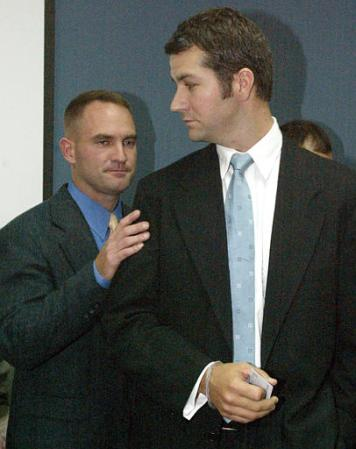

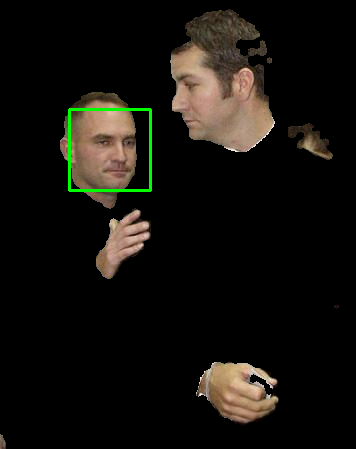

In [ ]:
# Cascade classifier untuk face detection
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/fitur-facedet/haarcascade_frontalface_default.xml')

# Load the image
image = cv2.imread('/content/drive/MyDrive/PCVK/images/Sample Citra FDDB/2002/07/29/big/img_889.jpg')

# Convert image to YCbCr color space
image_ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

# Define lower and upper bounds for skin color in YCbCr color space
lower_skin = np.array([0, 133, 77], dtype=np.uint8)
upper_skin = np.array([255, 173, 127], dtype=np.uint8)

# Create a binary mask for skin color
skin_mask = cv2.inRange(image_ycrcb, lower_skin, upper_skin)

# Apply morphological operations to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_OPEN, kernel)
skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_CLOSE, kernel)

# Find contours of skin regions
contours, _ = cv2.findContours(skin_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank mask for the final result
result_mask = np.zeros_like(image)

# Draw contours on the mask
cv2.drawContours(result_mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Apply the mask to the original image
result = cv2.bitwise_and(image, result_mask)

# Convert image to grayscale
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(result, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Display the original image
cv2_imshow(image)

# Display the segmented result with face detection
cv2_imshow(result)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [38]:
# Cascade classifier untuk face detection
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/fitur-facedet/haarcascade_profileface.xml')

# Load the image
image = cv2.imread('/content/drive/MyDrive/PCVK/images/Sample Citra FDDB/2002/07/29/big/img_889.jpg')

# Convert image to YCbCr color space
image_ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

# Define lower and upper bounds for skin color in YCbCr color space
lower_skin = np.array([0, 133, 77], dtype=np.uint8)
upper_skin = np.array([255, 173, 127], dtype=np.uint8)

# Create a binary mask for skin color
skin_mask = cv2.inRange(image_ycrcb, lower_skin, upper_skin)

# Apply morphological operations to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_OPEN, kernel)
skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_CLOSE, kernel)

# Find contours of skin regions
contours, _ = cv2.findContours(skin_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank mask for the final result
result_mask = np.zeros_like(image)

# Draw contours on the mask
cv2.drawContours(result_mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Apply the mask to the original image
result = cv2.bitwise_and(image, result_mask)

# Convert image to grayscale
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(result, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Display the original image
cv2_imshow(image)

# Display the segmented result with face detection
cv2_imshow(result)

cv2.waitKey(0)
cv2.destroyAllWindows()


error: ignored